In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

***Hypothesis Testing (A/B Testing)***

In [9]:
y = pd.read_csv('course_page_actions.csv')
y.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [10]:
obs_diff = y[y.group=='experiment'].duration.mean() - y[y.group=='control'].duration.mean()
obs_diff

15.537053609623726

In [11]:
y.shape

(4069, 5)

(array([  10.,   55.,  371., 1207., 2327., 2883., 1990.,  908.,  203.,
          46.]),
 array([ 6.68088677,  8.34321562, 10.00554448, 11.66787334, 13.33020219,
        14.99253105, 16.6548599 , 18.31718876, 19.97951761, 21.64184647,
        23.30417532]),
 <BarContainer object of 10 artists>)

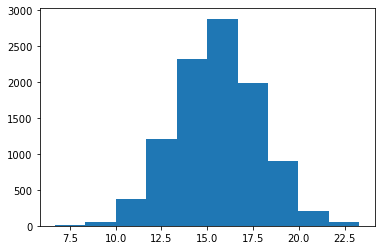

In [16]:
v=[]
for b in range(10000):
    sample = y.sample(y.shape[0],replace=True)
    v.append(sample[sample.group=='experiment'].duration.mean() - sample[sample.group=='control'].duration.mean())
plt.hist(v)

(array([3.000e+00, 3.500e+01, 3.360e+02, 1.217e+03, 2.526e+03, 3.087e+03,
        1.912e+03, 7.270e+02, 1.360e+02, 2.100e+01]),
 array([-9.33449938, -7.56344927, -5.79239915, -4.02134904, -2.25029892,
        -0.47924881,  1.29180131,  3.06285142,  4.83390153,  6.60495165,
         8.37600176]),
 <BarContainer object of 10 artists>)

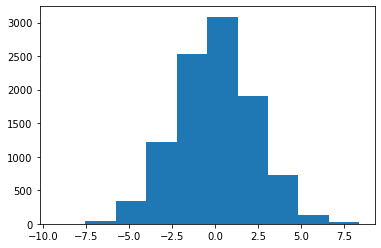

In [13]:
c = np.array(v)

null = np.random.normal(0,c.std(),c.size)
plt.hist(null)

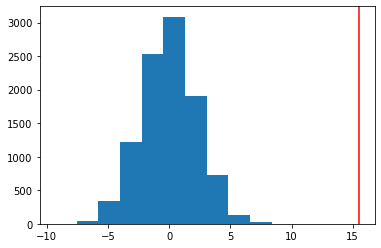

In [14]:
plt.hist(null)
plt.axvline(x = obs_diff,color = 'red')

In [15]:
(null>obs_diff).mean()

0.0

***The NULL Hypothsis is correct***

***second one***

In [3]:
x = pd.read_csv('classroom_actions.csv')
x.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [4]:
obs_diff = x[x.group=='experiment'].total_days.mean() - x[x.group=='control'].total_days.mean()
obs_diff

1.3026031488719099

In [5]:
x.shape

(3829, 5)

(array([   9.,   58.,  395., 1455., 2840., 2995., 1692.,  476.,   71.,
           9.]),
 array([-1.6962529 , -1.10298206, -0.50971123,  0.08355961,  0.67683045,
         1.27010128,  1.86337212,  2.45664295,  3.04991379,  3.64318463,
         4.23645546]),
 <BarContainer object of 10 artists>)

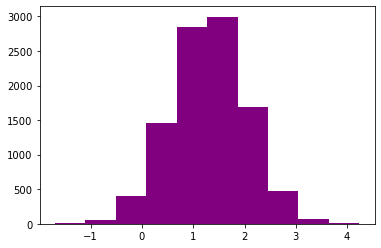

In [6]:

diff=[]
for _ in range(10000):
    sample = x.sample(x.shape[0],replace=True)
    diff.append(sample[sample.group=='experiment'].total_days.mean() - sample[sample.group=='control'].total_days.mean())
plt.hist(diff, color='purple')

(array([  18.,  111.,  564., 1523., 2755., 2686., 1630.,  567.,  127.,
          19.]),
 array([-2.69237214, -2.15647313, -1.62057411, -1.0846751 , -0.54877608,
        -0.01287707,  0.52302195,  1.05892096,  1.59481998,  2.13071899,
         2.66661801]),
 <BarContainer object of 10 artists>)

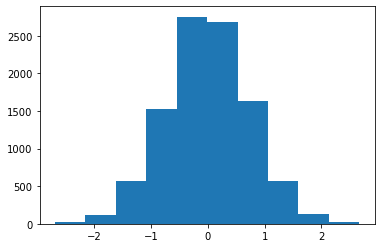

In [7]:
x = np.array(diff)
#np.std(diff)
#np.
null = np.random.normal(0,x.std(),x.size)
plt.hist(null)

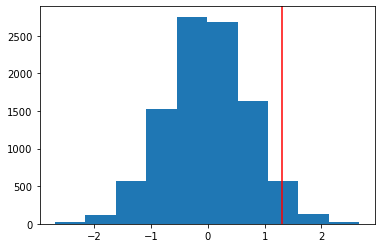

In [8]:
plt.hist(null)
plt.axvline(x = obs_diff,color = 'red')

In [45]:
(null>obs_diff).mean()


0.0394

***The alternative Hypothsis is correct***